# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
x = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\huang\AppData\Local\Temp\ipykernel_8024\1059253694.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
x = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [6]:
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(108648, 10)
(108648,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
#公共import区
#不管用不用先import
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split

#二八开
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

#看看shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((86918, 10), (21730, 10), (86918,), (21730,))

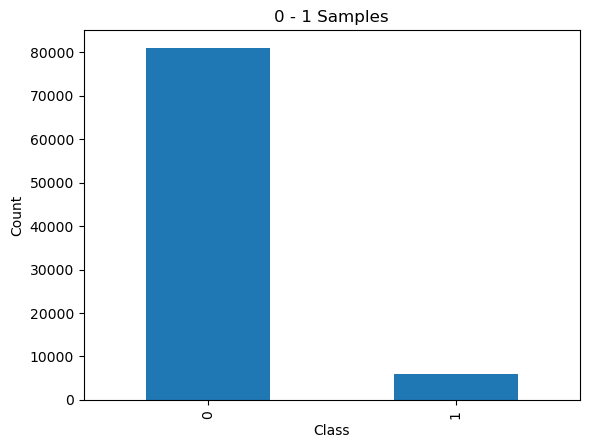

In [9]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts


# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')


class_counts = y_train.value_counts()

# 绘制柱状图
class_counts.plot(kind='bar')

# 设置图像标题和坐标轴标签
plt.title('0 - 1 Samples')
plt.xlabel('Class')
plt.ylabel('Count')


plt.show()


#### 2.数据预处理之离散化

In [10]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)


# 计算分桶边界
min_age = math.floor(data['age'].min())
max_age = math.ceil(data['age'].max())
bucket_size = 3
bin_edges = list(range(min_age, max_age + bucket_size, bucket_size))

# 进行离散化
data['age_group'] = pd.cut(data['age'].astype(int), bins=bin_edges)

print(data['age_group'])


0         (42, 45]
1         (39, 42]
2         (36, 39]
3         (27, 30]
4         (48, 51]
            ...   
112910    (48, 51]
112911    (72, 75]
112912    (42, 45]
112913    (27, 30]
112914    (63, 66]
Name: age_group, Length: 108648, dtype: category
Categories (35, interval[int64, right]): [(0, 3] < (3, 6] < (6, 9] < (9, 12] ... (93, 96] < (96, 99] < (99, 102] < (102, 105]]


#### 3.数据预处理之独热向量编码

In [11]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

age=pd.get_dummies(data,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
data




,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"(42, 45]"
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"(39, 42]"
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"(36, 39]"
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"(27, 30]"
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"(48, 51]"
...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"(48, 51]"
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"(72, 75]"
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"(42, 45]"
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"(27, 30]"


#### 4.数据预处理之幅度缩放

In [12]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

x_train_std = Scaler.fit_transform(x_train)
x_test_std = Scaler.transform(x_test)
x_train_std.shape

print(x_train_std)

[[-0.02049869 -0.37014321 -0.10751185 ...  3.70115906 -0.05430916
  -0.74380028]
 [-0.02201472  1.84516141 -0.10751185 ... -0.01244376 -0.05430916
  -0.74380028]
 [-0.0224469   0.04522641 -0.10751185 ... -0.01244376 -0.05430916
  -0.74380028]
 ...
 [-0.02150673  1.08365045 -0.10751185 ... -0.01244376 -0.05430916
  -0.74380028]
 [-0.01882665 -1.54702379  0.17587602 ... -0.94084447 -0.05430916
   1.86310984]
 [-0.02216609  0.46059602  0.45926388 ...  0.91595694 -0.05430916
  -0.74380028]]


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [13]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 创建LogisticRegression模型对象
model = LogisticRegression()

# 拟合模型
model.fit(x_train_std, y_train)

# 获取模型的coef属性
coef = model.coef_[0]

print(abs(coef))  
score = model.score(x_train_std, y_train)
print(score)

#返回系数
feat_labels = data.columns[1:]
coefs = model.coef_
indices=np.argsort(coefs[0])[::-1]

#打印各个columns的coefs，取绝对值
for f in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(f,30,feat_labels[indices[f]], abs(coefs[0,indices[f]])))


[0.01750468 0.36145719 1.66328999 0.31381539 0.09796167 0.09974412
 1.62024725 0.19082986 3.11157253 0.11958916]
0.9329713062886859
 0) NumberOfTime30-59DaysPastDueNotWorse 1.663290
 1) NumberOfTimes90DaysLate        1.620247
 2) DebtRatio                      0.313815
 3) NumberOfDependents             0.119589
 4) RevolvingUtilizationOfUnsecuredLines 0.017505
 5) MonthlyIncome                  0.097962
 6) NumberOfOpenCreditLinesAndLoans 0.099744
 7) NumberRealEstateLoansOrLines   0.190830
 8) age                            0.361457
 9) NumberOfTime60-89DaysPastDueNotWorse 3.111573


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [14]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV


# 定义参数网格字典
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

# 创建GridSearchCV对象
grid_search = GridSearchCV(model, param_grid, cv=5)

# 执行网格搜索交叉验证
grid_search.fit(x_train_std, y_train)

grid_search.fit(x_train_std, y_train)

grid_search.score(x_test_std, y_test)



C:\Users\huang\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\huang\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huang\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

0.9343304187758859

In [15]:
# 输出最好的超参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 输出最好的模型
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

#交叉验证的best_score
best_score = grid_search.best_score_ 
print('Best score ',best_score)


Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Model: LogisticRegression(C=10)
Best score  0.9330518416480823


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

Precision: 0.9343304187758859
Recall: 0.0370888733379986
AUC: 0.5172883409101697
F1 Score: 0.06914546640574037


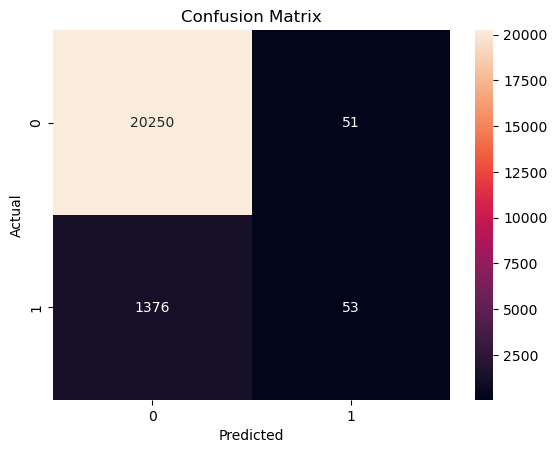

In [16]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score


# 在测试集上进行预测
y_pred = best_model.predict(x_test_std)

# 计算查准率
precision = accuracy_score(y_test, y_pred)
print("Precision:", precision)

# 计算查全率
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# 计算AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# 计算F1值
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [17]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.preprocessing import binarize

y_pred_prob = model.predict_proba(x_test_std)[:,1]
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

# print the 10 predicted probabilities
print(y_pred_prob[60:70])

[0.06505078 0.20612512 0.03574826 0.05886652 0.124397   0.01514616
 0.05353815 0.03383186 0.04776965 0.0458279 ]


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [18]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, 
                              random_state=0)
feat_labels = data.columns[1:]
tree.fit(x_train_std, y_train)

#打分
score = tree.score(x_test_std, y_test)
print('score:', score)


#各特征的imporance
importance = tree.feature_importances_

indices = np.argsort(importance)[::-1]
for f in range(x_train.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1,feat_labels[indices[f]],importance[indices[f]]))


score: 0.9320754716981132
1    NumberOfTimes90DaysLate                  0.37166230111562326
2    RevolvingUtilizationOfUnsecuredLines     0.25190791379543204
3    NumberOfTime30-59DaysPastDueNotWorse     0.11105616386274593
4    DebtRatio                                0.0650998516025923
5    NumberOfTime60-89DaysPastDueNotWorse     0.05694823584063825
6    MonthlyIncome                            0.05289192438428664
7    age                                      0.04159699016947035
8    NumberOfOpenCreditLinesAndLoans          0.029236007913591034
9    NumberOfDependents                       0.01279687256682744
10   NumberRealEstateLoansOrLines             0.006803738748792796


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [19]:
#期末事情多任务多，就先不调参了，用的都是各模型默认的参数，老师辛苦了
# 随机森林
from sklearn.ensemble import RandomForestClassifier

print("================RandomForest_Result================")
feat_labels = data.columns[1:]
RF = RandomForestClassifier()
RF.fit(x_train_std, y_train)

#评分和各特征importance
score = RF.score(x_test_std, y_test)
print('RF---Score:',score)
importance  = RF.feature_importances_

indices = np.argsort(importance)[::-1]
for f in range(x_train_std.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1,feat_labels[indices[f]], importance[indices[f]]))



================RandomForest_Result================
RF---Score: 0.9359410952600092
1    RevolvingUtilizationOfUnsecuredLines     0.19126126617193087
2    DebtRatio                                0.17383665187446443
3    MonthlyIncome                            0.16512600935123822
4    age                                      0.12198784427539304
5    NumberOfOpenCreditLinesAndLoans          0.08910604823185903
6    NumberOfTimes90DaysLate                  0.08261885112725328
7    NumberOfTime30-59DaysPastDueNotWorse     0.052255010386793144
8    NumberOfTime60-89DaysPastDueNotWorse     0.04601501361305309
9    NumberOfDependents                       0.04600777161306748
10   NumberRealEstateLoansOrLines             0.03178553335494745


In [20]:
# 支持向量机
from sklearn.svm import SVC

print("================SVM_Result================")

feat_labels = data.columns[1:]
svm = SVC(kernel='linear',class_weight='balanced'
          ,max_iter=24000)#电脑太菜了得加个最大迭代次数，不然卡死0.0

svm.fit(x_train_std, y_train)

#评分
score = svm.score(x_test_std, y_test)
print('SVM---Score:',score)
coefs = svm.coef_
indices = np.argsort(coefs[0])[::-1]

for f in range(x_train_std.shape[1]):
    print('%2d) %-*s %f'%(f,30,feat_labels[indices[f]],coefs[0,indices[f]]))




================SVM_Result================


C:\Users\huang\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=24000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM---Score: 0.08021168890934192
 0) DebtRatio                      0.476054
 1) NumberOfTimes90DaysLate        0.143681
 2) MonthlyIncome                  -0.000181
 3) NumberOfTime30-59DaysPastDueNotWorse -0.005851
 4) RevolvingUtilizationOfUnsecuredLines -0.008932
 5) NumberOfOpenCreditLinesAndLoans -0.022733
 6) age                            -0.026718
 7) NumberOfTime60-89DaysPastDueNotWorse -0.149190
 8) NumberRealEstateLoansOrLines   -0.193119
 9) NumberOfDependents             -0.204548


In [36]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

print("================KNeighborsClassifier_Result================")

KNE = KNeighborsClassifier()

KNE.fit(x_train_std, y_train)

feat_labels = data.columns[1:]

#对分类进行评分

score = KNE.score(x_train_std,y_train)

print('KNeighborsClassifier---score:',score)


================KNeighborsClassifier_Result================
KNeighborsClassifier---score: 0.9351342644791643


* KNeighborsClassifier并不直接提供特征重要性的属性或方法,它根据最近邻居的标签进行分类，而不是通过特征权重来进行预测。
* 所以今天的我不知道咋做KNeighborsClassifier的特征排序了，后面相信之后的我是没问题的
* 准备期末去了0.0